In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.naive_bayes import MultinomialNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/'

**Lưu kết quả thử nghiệm**

In [ ]:
# Creating model results Naive Bayes
nameNB = []
acc_testNB = []
precision_testNB = []
recall_testNB = []
f1_testNB = []

#storing the results Naive Bayes
def storeResultsNB(model, a, b, c, d):
    nameNB.append(model)
    acc_testNB.append(round(a, 4))
    precision_testNB.append(round(b, 4))
    recall_testNB.append(round(c, 4))
    f1_testNB.append(round(d, 4))

# Creating model results Logistic Regression
nameLR = []
acc_testLR = []
precision_testLR = []
recall_testLR = []
f1_testLR = []

#storing the results Logistic Regression
def storeResultsLR(model, a, b, c, d):
    nameLR.append(model)
    acc_testLR.append(round(a, 4))
    precision_testLR.append(round(b, 4))
    recall_testLR.append(round(c, 4))
    f1_testLR.append(round(d, 4))

# Creating model results SVM
nameSVM = []
acc_testSVM = []
precision_testSVM = []
recall_testSVM = []
f1_testSVM = []

#storing the results SVM
def storeResultsSVM(model, a, b, c, d):
    nameSVM.append(model)
    acc_testSVM.append(round(a, 4))
    precision_testSVM.append(round(b, 4))
    recall_testSVM.append(round(c, 4))
    f1_testSVM.append(round(d, 4))

**Tách từ, xóa stopword**

In [ ]:
X_train = pd.read_csv(path+'/dataset/train/data.csv').reset_index()
y_train = pd.read_csv(path+'/dataset/train/label.csv').reset_index()
X_test = pd.read_csv(path+'/dataset/test/data.csv').reset_index()
y_test = pd.read_csv(path+'/dataset/test/label.csv').reset_index()

**Không tách từ, không xóa stopword**

In [ ]:
X_train = pd.read_csv(path+'/dataset3/train/data.csv').reset_index()
y_train = pd.read_csv(path+'/dataset3/train/label.csv').reset_index()
X_test = pd.read_csv(path+'/dataset3/test/data.csv').reset_index()
y_test = pd.read_csv(path+'/dataset3/test/label.csv').reset_index()

**Tách từ, không xóa stopword**

In [ ]:
X_train = pd.read_csv(path+'/dataset2/train/data.csv').reset_index()
y_train = pd.read_csv(path+'/dataset2/train/label.csv').reset_index()
X_test = pd.read_csv(path+'/dataset2/test/data.csv').reset_index()
y_test = pd.read_csv(path+'/dataset2/test/label.csv').reset_index()

In [ ]:
X_train = X_train['0'].values
y_train = y_train['Topic'].values

X_test = X_test['0'].values
y_test = y_test['Topic'].values

In [ ]:
X_train = X_train.flatten()
X_test = X_test.flatten()
y_train = y_train.flatten()
y_test = y_test.flatten()

In [ ]:
vectorizer = TfidfVectorizer()
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)
X_train_vector.shape[0]

2323

In [ ]:
vocabulary = vectorizer.vocabulary_

tfidf_matrix_array = X_train_vector.toarray()
print("Vocabulary:", vocabulary)

Vocabulary: {'báo': 656, 'trung_quốc': 6687, 'kêu_gọi': 3373, 'đội': 8453, 'bổ_nhiệm': 921, 'gấp': 2458, 'hlv': 2570, 'park_hang_seo': 4963, 'tờ': 7280, 'sohu': 5706, 'liên_đoàn': 3543, 'bóng_đá': 720, 'dẫn_dắt': 1995, 'u23': 7332, 'mục_tiêu': 4249, 'dự': 2032, 'olympic': 4921, '2024': 109, 'quảng_nam': 5363, 'bé': 671, 'trai': 6618, 'bỏng': 901, 'toàn': 6600, 'mặt': 4191, 'nổ': 4864, 'bóng': 713, 'bay': 489, 'tỉnh': 7220, 'tia': 6453, 'lửa': 3869, 'phát_nổ': 5062, 'sử_dụng': 5917, 'túi_xách': 7113, 'custom': 1447, 'nhu_cầu': 4592, 'rủi_ro': 5549, 'túi': 7110, 'bản_gốc': 772, 'thương_hiệu': 6258, 'nổi_tiếng': 4871, 'dần': 1985, 'trở_thành': 6875, 'xu_hướng': 7775, 'chị_em': 1305, 'lựa_chọn': 3871, 'tuy_nhiên': 6916, 'kèm': 3363, 'liên_quan': 3538, 'pháp_luật': 5051, 'xiaomi': 7757, 'phát_hành': 5059, 'sách_trắng': 5781, 'đầu_tiên': 8272, 'chương_trình': 1248, 'hành_động': 2757, 'khí_hậu': 3208, 'giới_thiệu': 2380, 'chi_tiết': 1067, 'phương_thức': 5140, 'đa_dạng': 7986, 'tập_đoàn': 7201

#Naive Bayes

In [ ]:
nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(X_train_vector, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
y_pred = nb_classifier.predict(X_test_vector)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8364888123924269
Precision: 0.837327371800126
Recall: 0.8319615798994301
F1 Score: 0.8331749157030388


In [ ]:
storeResultsNB('Tach tu, xoa stopword', accuracy, precision, recall, f1)

In [ ]:
storeResultsNB('Khong tach tu, khong xoa stopword', accuracy, precision, recall, f1)

In [ ]:
storeResultsNB('Tach tu, khong xoa stopword', accuracy, precision, recall, f1)

In [ ]:
results = pd.DataFrame({ 'name': nameNB,
    'Accuracy': acc_testNB,
    'Precision': precision_testNB,
    'Recall': recall_testNB,
    'F1': f1_testNB})
results

,name,Accuracy,Precision,Recall,F1
0,"Tach tu, xoa stopword",0.8227,0.8308,0.8204,0.8239
1,"Khong tach tu, khong xoa stopword",0.8124,0.8147,0.8082,0.8091
2,"Tach tu, khong xoa stopword",0.8365,0.8373,0.8320,0.8332


**Tách từ, xóa stopword**

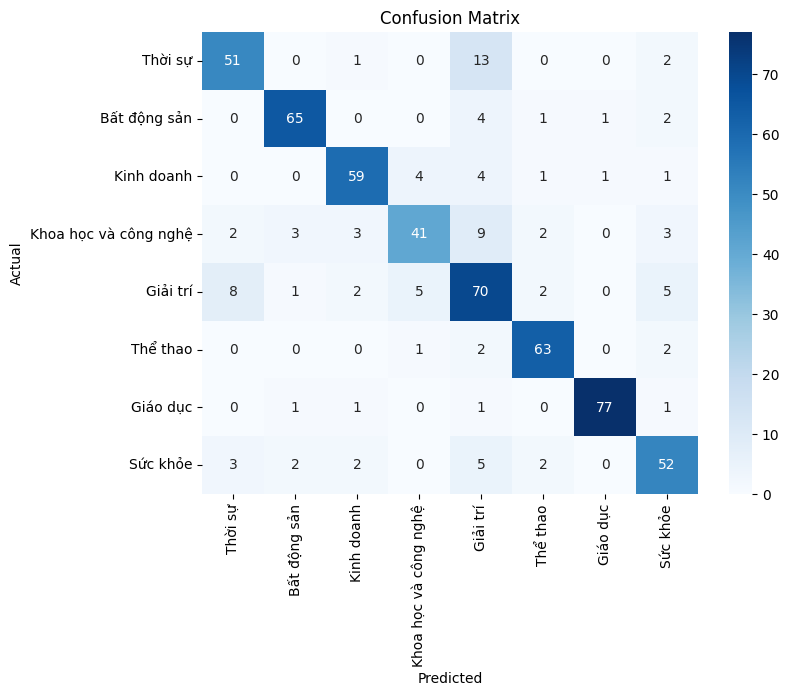

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
label_class = ['Thời sự', 'Bất động sản', 'Kinh doanh', 'Khoa học và công nghệ', 'Giải trí', 'Thể thao', 'Giáo dục', 'Sức khỏe']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_class, yticklabels=label_class)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Không tách từ, không xóa stopword**

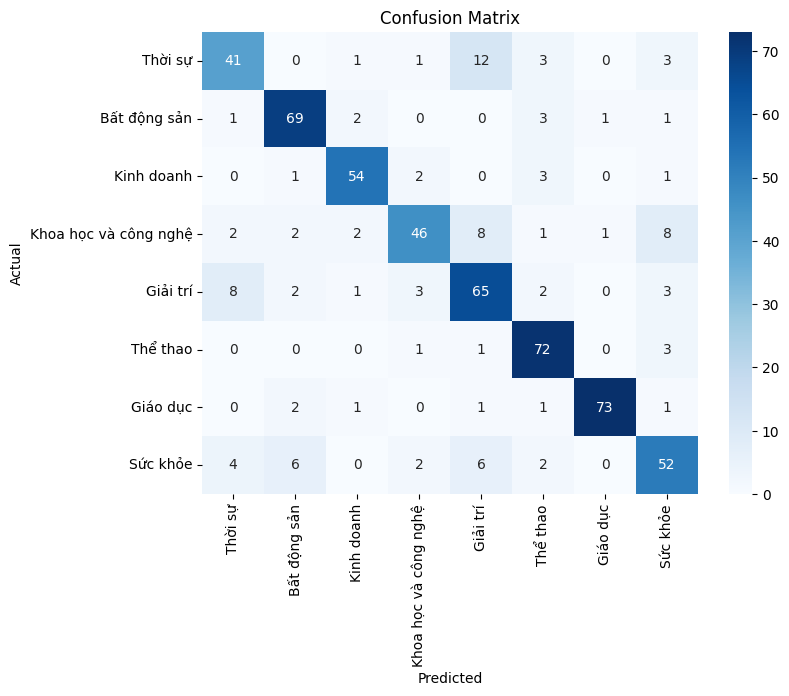

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
label_class = ['Thời sự', 'Bất động sản', 'Kinh doanh', 'Khoa học và công nghệ', 'Giải trí', 'Thể thao', 'Giáo dục', 'Sức khỏe']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_class, yticklabels=label_class)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Tách từ, không xóa stopword**

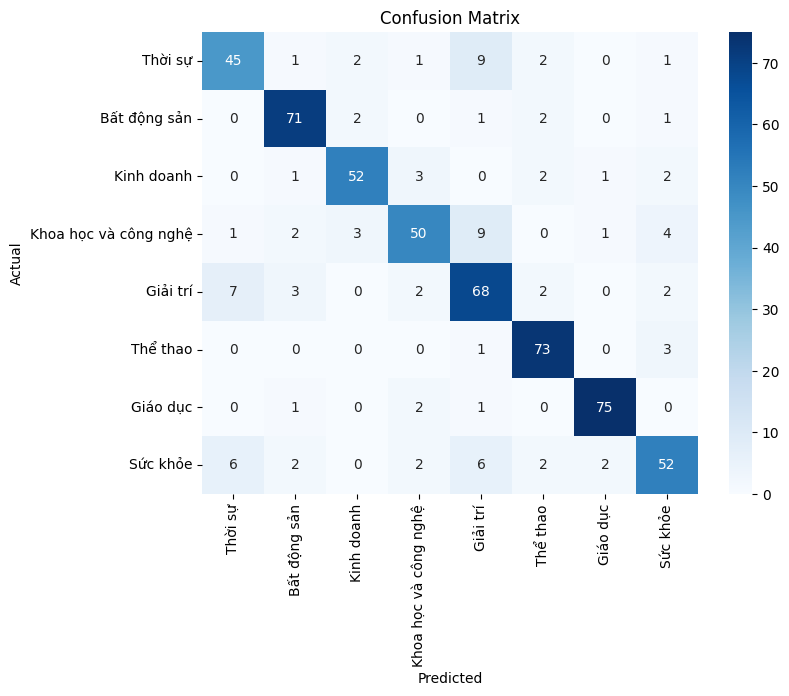

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
label_class = ['Thời sự', 'Bất động sản', 'Kinh doanh', 'Khoa học và công nghệ', 'Giải trí', 'Thể thao', 'Giáo dục', 'Sức khỏe']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_class, yticklabels=label_class)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Logistic Regression

In [ ]:
lr_classifier = LogisticRegression()

In [ ]:
lr_classifier.fit(X_train_vector, y_train)
y_pred = lr_classifier.predict(X_test_vector)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8261617900172117
Precision: 0.8333223006180366
Recall: 0.8196579928999778
F1 Score: 0.8234208282700552


In [ ]:
storeResultsLR('Tach tu, xoa stopword', accuracy, precision, recall, f1)

In [ ]:
storeResultsLR('Khong tach tu, khong xoa stopword', accuracy, precision, recall, f1)

In [ ]:
storeResultsLR('Tach tu, khong xoa stopword', accuracy, precision, recall, f1)

In [ ]:
results = pd.DataFrame({ 'name': nameLR,
    'Accuracy': acc_testLR,
    'Precision': precision_testLR,
    'Recall': recall_testLR,
    'F1': f1_testLR})
results

,name,Accuracy,Precision,Recall,F1
0,"Tach tu, xoa stopword",0.8210,0.8255,0.8201,0.8216
1,"Khong tach tu, khong xoa stopword",0.8124,0.8141,0.8082,0.8091
2,"Tach tu, khong xoa stopword",0.8262,0.8333,0.8197,0.8234


**Tách từ, xóa stopword**

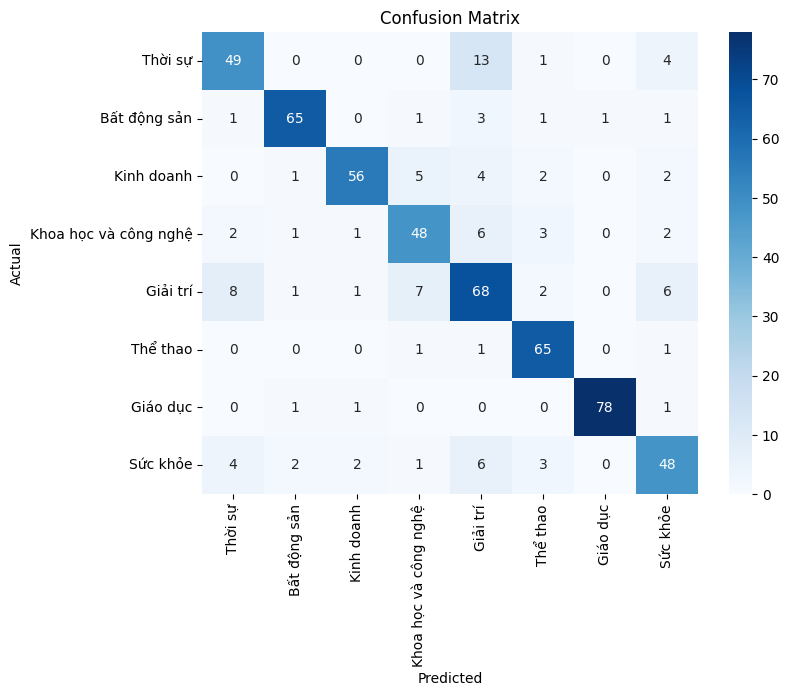

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
label_class = ['Thời sự', 'Bất động sản', 'Kinh doanh', 'Khoa học và công nghệ', 'Giải trí', 'Thể thao', 'Giáo dục', 'Sức khỏe']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_class, yticklabels=label_class)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Không tách từ, không xóa stopword**

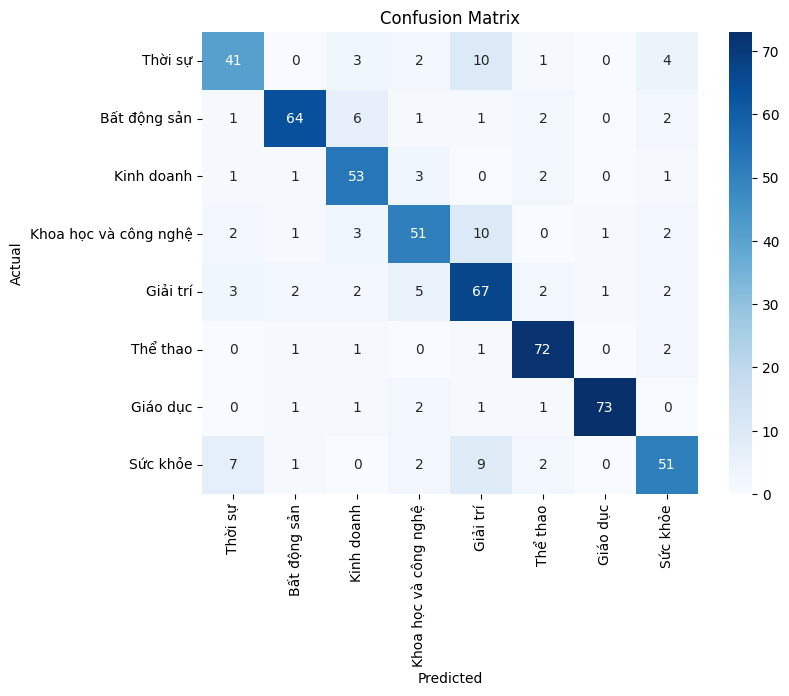

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
label_class = ['Thời sự', 'Bất động sản', 'Kinh doanh', 'Khoa học và công nghệ', 'Giải trí', 'Thể thao', 'Giáo dục', 'Sức khỏe']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_class, yticklabels=label_class)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Tách từ, không xóa stopword**

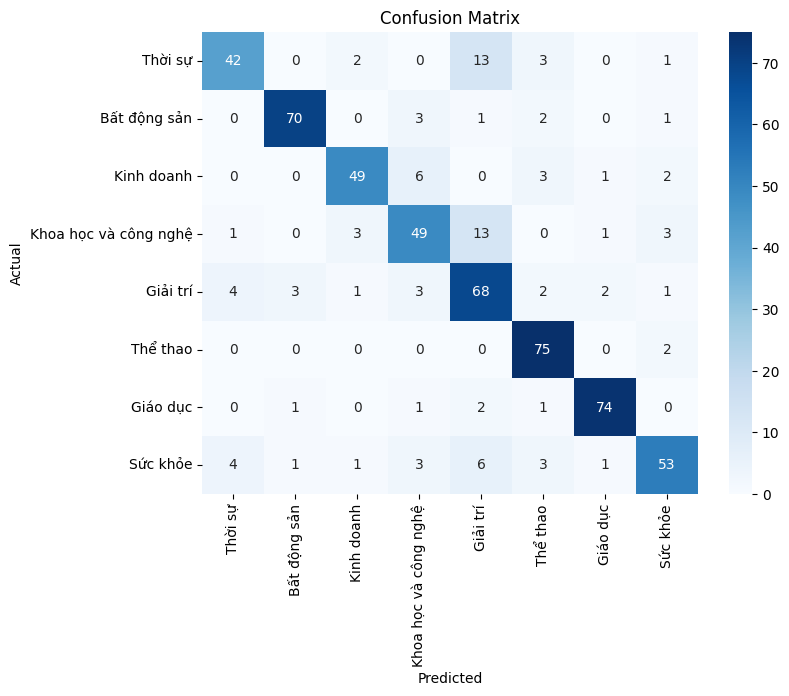

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
label_class = ['Thời sự', 'Bất động sản', 'Kinh doanh', 'Khoa học và công nghệ', 'Giải trí', 'Thể thao', 'Giáo dục', 'Sức khỏe']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_class, yticklabels=label_class)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#SVM

In [ ]:
svm = SVC(C=3)
svm.fit(X_train_vector, y_train)

SVC(C=3)

In [ ]:
y_pred = svm.predict(X_test_vector)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8347676419965576
Precision: 0.8406644462134678
Recall: 0.8299085555103402
F1 Score: 0.8336498667524284


In [ ]:
storeResultsSVM('Tach tu, xoa stopword', accuracy, precision, recall, f1)

In [ ]:
storeResultsSVM('Khong tach tu, khong xoa stopword', accuracy, precision, recall, f1)

In [ ]:
storeResultsSVM('Tach tu, khong xoa stopword', accuracy, precision, recall, f1)

In [ ]:
results = pd.DataFrame({ 'name': nameSVM,
    'Accuracy': acc_testSVM,
    'Precision': precision_testSVM,
    'Recall': recall_testSVM,
    'F1': f1_testSVM})
results

,name,Accuracy,Precision,Recall,F1
0,"Tach tu, xoa stopword",0.8382,0.8426,0.8360,0.8384
1,"Khong tach tu, khong xoa stopword",0.8193,0.8188,0.8156,0.8161
2,"Tach tu, khong xoa stopword",0.8348,0.8407,0.8299,0.8336


**Tách từ, xóa stopword**

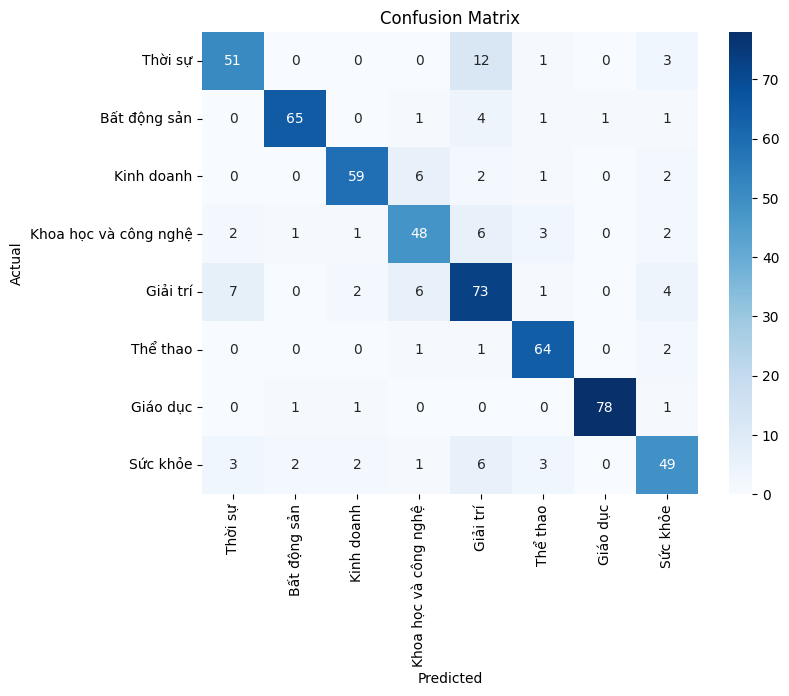

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
label_class = ['Thời sự', 'Bất động sản', 'Kinh doanh', 'Khoa học và công nghệ', 'Giải trí', 'Thể thao', 'Giáo dục', 'Sức khỏe']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_class, yticklabels=label_class)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Không tách từ, không xóa stopword**

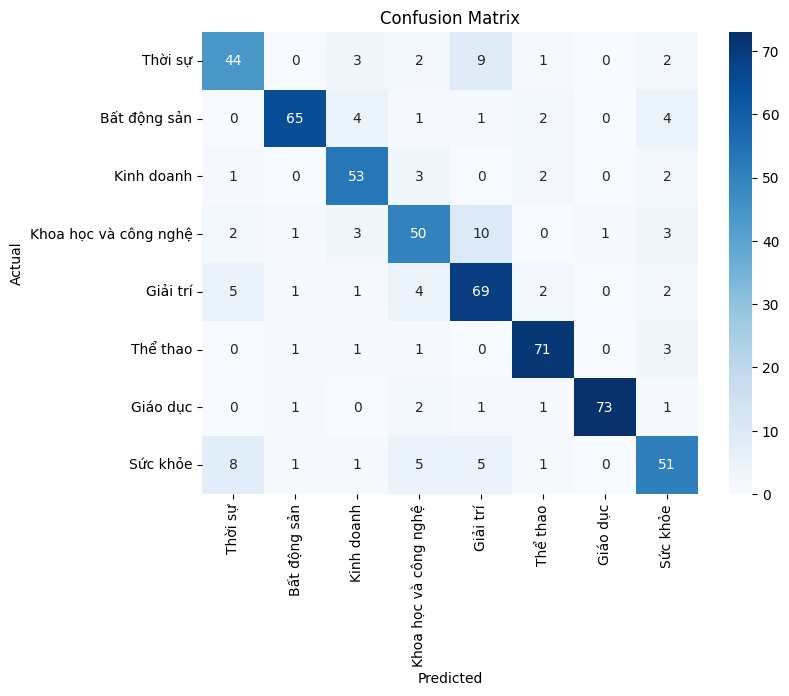

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
label_class = ['Thời sự', 'Bất động sản', 'Kinh doanh', 'Khoa học và công nghệ', 'Giải trí', 'Thể thao', 'Giáo dục', 'Sức khỏe']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_class, yticklabels=label_class)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Tách từ, không xóa stopword**

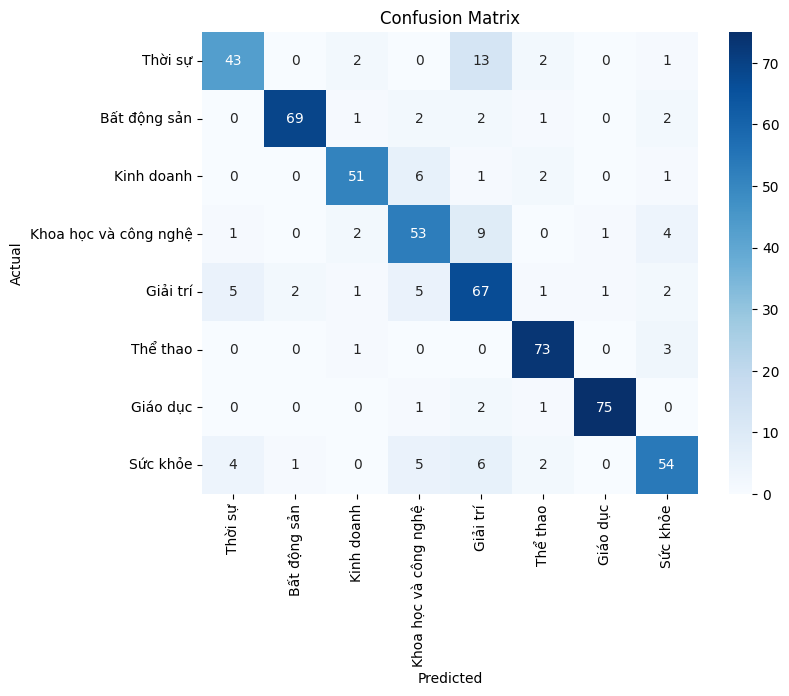

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
label_class = ['Thời sự', 'Bất động sản', 'Kinh doanh', 'Khoa học và công nghệ', 'Giải trí', 'Thể thao', 'Giáo dục', 'Sức khỏe']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_class, yticklabels=label_class)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()